In [1]:
# Dependencies
import json
import requests
import pandas as pd
from config import api_key
import random 
import matplotlib.pyplot as plt
from citipy import citipy
import urllib

In [2]:
cities_csv = "worldcities.csv"
cities_df = pd.read_csv(cities_csv)
# cities_df = pd.cities_df1['Latitude']['Longitude']
cities_df.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city_list =[]
lat_random = []
lon_random = []
query_url = []
for i in range(1000):
    lat_random.append(random.choice(cities_df['Latitude']))
    lon_random.append(random.choice(cities_df['Longitude']))
    citiname = citipy.nearest_city(float(lat_random[i]), float(lon_random[i])).city_name
    if citiname not in city_list:
        city_list.append(citiname)


In [12]:
len(city_list)
# print(name)
# print(query_url)

810

In [13]:
temp = []
humidity = []
cloud = []
wind = []
lat = []
lon = []
country = []
date = []
maxtemp = []
city_name =[]


for i, city in enumerate(city_list):
    query_url = url +"&appid=" + api_key + "&q=" + urllib.request.pathname2url(city)
#     print(query_url)
    try:
        response = requests.get(query_url).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        maxtemp.append(response['main']['temp_max'])
        print(f"Processing Record for {city}")
    except:
        print(f"{city} Not found")
        pass



Processing Record for serafimovich
Processing Record for saint george
Processing Record for ati
yian Not found
jiddah Not found
Processing Record for minervino murge
Processing Record for tahoua
Processing Record for puerto cabezas
Processing Record for yaan
Processing Record for severo-kurilsk
Processing Record for lepaterique
Processing Record for midland
Processing Record for san cristobal
Processing Record for ozinki
Processing Record for cockburn town
Processing Record for jitotol
Processing Record for grindavik
Processing Record for hopfgarten
Processing Record for pozorice
Processing Record for sao filipe
Processing Record for tekeli
lushunkou Not found
Processing Record for tutoia
Processing Record for madimba
Processing Record for fort frances
Processing Record for georgetown
Processing Record for thetford mines
Processing Record for touba
Processing Record for bodden town
Processing Record for saryozek
Processing Record for general roca
Processing Record for zaysan
Processing

Processing Record for tuscaloosa
Processing Record for west bay
Processing Record for ekibastuz
Processing Record for baltimore
Processing Record for vernon
Processing Record for gimli
Processing Record for boras
Processing Record for champerico
kousseri Not found
Processing Record for zhuanghe
Processing Record for gamba
Processing Record for zemio
Processing Record for dospat
Processing Record for pitsunda
Processing Record for fort morgan
Processing Record for khani
Processing Record for bandarbeyla
Processing Record for nikolskoye
Processing Record for constitucion
Processing Record for rionero in vulture
Processing Record for oume
Processing Record for west wendover
Processing Record for khilok
Processing Record for hueyotlipan
talah Not found
Processing Record for kastrakion
Processing Record for arlit
Processing Record for methoni
Processing Record for husasau de tinca
Processing Record for bad ischl
Processing Record for nishihara
Processing Record for ouadda
Processing Record 

Processing Record for marawi
Processing Record for fivizzano
Processing Record for tumsar
Processing Record for rovinj
Processing Record for pavlovsk
Processing Record for kotovo
Processing Record for emmett
Processing Record for opatija
Processing Record for grasse
Processing Record for disraeli
Processing Record for faya
Processing Record for okha
Processing Record for kincardine
Processing Record for svarstad
Processing Record for airai
Processing Record for ginir
Processing Record for wajima
Processing Record for pomabamba
Processing Record for winterberg
Processing Record for nanpiao
warqla Not found
Processing Record for dunmore town
Processing Record for hargeysa
Processing Record for bangao
Processing Record for pervomayskoye
Processing Record for great falls
palaiokhora Not found
Processing Record for basco
grande-riviere Not found
Processing Record for pedernales
Processing Record for kachiry
tingrela Not found
Processing Record for bayan
Processing Record for lucapa
Processi

In [16]:
len(maxtemp)


740

In [17]:
dictionary = {
    'cities': city_name,
    'country':country,
    'temp': temp,
    'humidity': humidity,
    'cloud': cloud,
    'wind': wind,    
    'max temp': maxtemp,
    'lat': lat,
    'long': lon
}

weather_data = pd.DataFrame(dictionary)
weather_data.head(10)

,cities,cloud,country,humidity,lat,long,max temp,temp,wind
0,Serafimovich,56,RU,94,49.58,42.73,275.531,275.531,5.81
1,Saint George,20,GR,61,39.45,22.34,282.150,282.150,3.60
2,Ati,0,TD,21,13.21,18.34,296.806,296.806,4.71
3,Minervino Murge,20,IT,87,41.09,16.08,281.150,281.150,4.10
4,Tahoua,0,NE,33,14.89,5.26,293.356,293.356,2.31
5,Puerto Cabezas,40,NI,88,14.04,-83.39,301.150,301.150,3.10
6,Yaan,24,NG,81,7.38,8.57,299.156,299.156,5.26
7,Severo-Kurilsk,56,RU,100,50.68,156.12,271.206,271.206,3.31
8,Lepaterique,75,HN,36,14.07,-87.47,299.150,299.150,5.10
9,Midland,48,US,33,32.00,-102.08,299.150,296.400,8.70


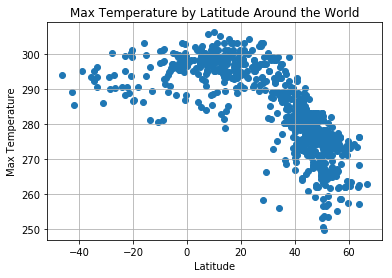

In [18]:
# Create a scatter plot for each data type
plt.scatter(weather_data["lat"],weather_data["max temp"], marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Max Temperature by Latitude Around the World")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure


# Display to screen 

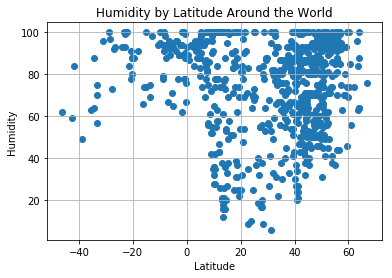

In [19]:
# Create a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Humidity by Latitude Around the World")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure


# Display to screen 


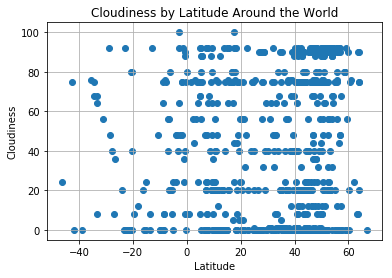

In [20]:
# Create a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloud"], marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Cloudiness by Latitude Around the World")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure


# Display to screen 

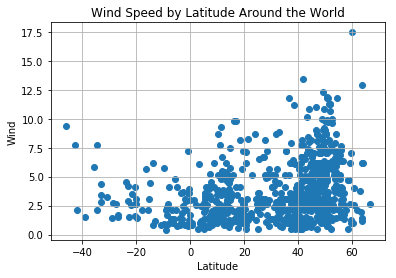

In [22]:
# Create a scatter plot for each data type
wind_lat = plt.scatter(weather_data["lat"], weather_data["wind"],marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Wind Speed by Latitude Around the World")
plt.ylabel("Wind")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure
plt.savefig("wind_lat.png", format="png")

# Display to screen 